# The Extinction Game


## First, a common game

Let's begin with a simple example of probabilities. Let's say that the probability of winning a game is given by $P$. I want to find out how many games I can play before the odds of having lost at least once reach a given probability. That is to say, how many games can I expect to win in a row with a given probability?

We'll use the following notation:

$$
\begin{align}
n:& \text{Number of games} \\
P:& \text{Probability of winning one game}\\
P_n:&\text{Probability of winning n games in a row}
\end{align}
$$

To make it easier to imagine, let's use concrete numbers. Let's assume that the odds of winning a single game are 95%. Then, how many games can I expect to win in a row with a 70% chance?

Well, to win $n$ games in a row, I need to win the first game, and the second, and the third, etc. until the $n$th game. I can express that as follows:

$$
P_n=P^n
$$

So $P_n$ is the probability to win $n$ games in a row, which I can set to a fixed value, in our case, 70%. I can also re-arrange this equation to get $n$:

$$
\begin{align}
\log(P_n)&=\log(P^n)\\
\log(P_n)&=n\log(P)\\
n&=\frac{\log(P_n)}{\log(P)}\\
n&=\frac{\log(0.7)}{\log(0.95)}\\
n&\approx 6.95 \\
\end{align}
$$

So, in this setup, I have a probability of 70% of winning 6 games. It makes sense to round down since I can only play a discrete number of games, and if I round up, I can assume that the probability of winning 7 games is less than winning 6.

/var/folders/gp/134vcy4x6c19634zvbkbff900000gn/T/ipykernel_89433/127997899.py:13: RuntimeWarning: divide by zero encountered in log
  return np.log(P_n)/np.log(P)
/var/folders/gp/134vcy4x6c19634zvbkbff900000gn/T/ipykernel_89433/127997899.py:13: RuntimeWarning: divide by zero encountered in divide
  return np.log(P_n)/np.log(P)


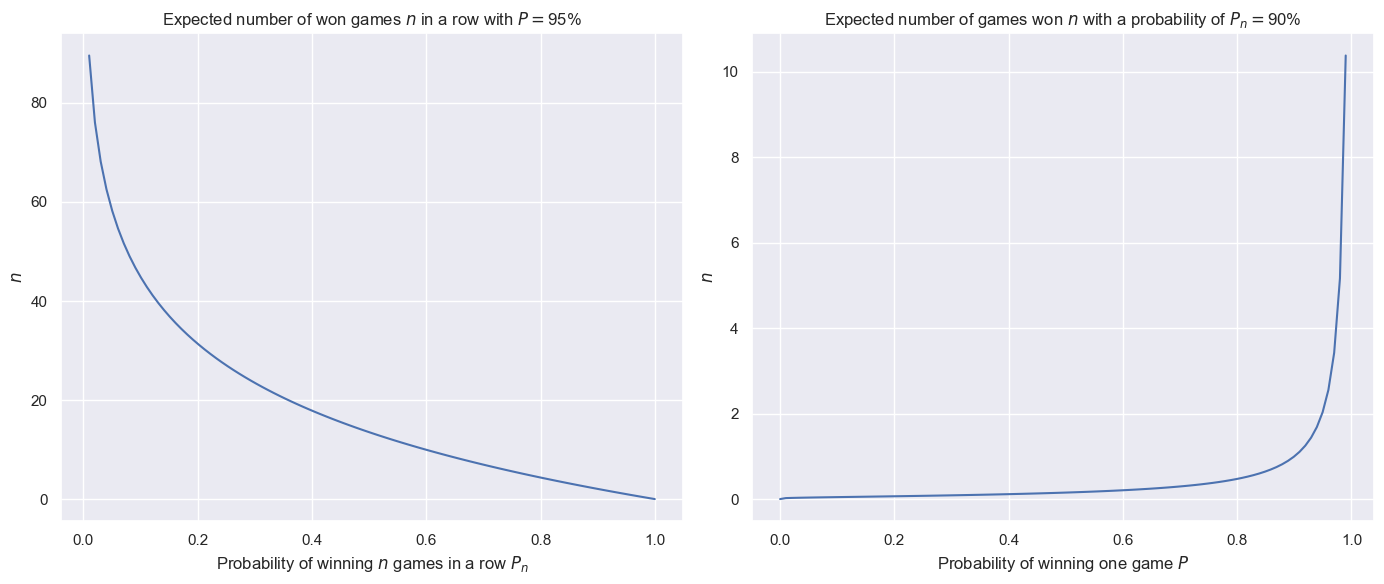

In [3]:
# Visualize n as a function of the probability to win n games in a row.
# 
# However, to simplify things, we'll use a fixed value for P, and plot n(W) as a function of W.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_style('darkgrid')

def n(P, P_n):
    return np.log(P_n)/np.log(P)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot n as a function of P_n with P fixed
E = 0.95
P_n = np.linspace(0, 1, 100)
ax1.plot(P_n, n(E, P_n))
ax1.set_xlabel('Probability of winning $n$ games in a row $P_n$')
ax1.set_ylabel('$n$')
ax1.set_title(f'Expected number of won games $n$ in a row with $P=${E:.0%}')

# Plot n as a function of P with P_n fixed
P_n = 0.9
E = np.linspace(0, 1, 100)
ax2.plot(E, n(E, P_n))
ax2.set_xlabel('Probability of winning one game $P$')
ax2.set_ylabel('$n$')
ax2.set_title(f'Expected number of games won $n$ with a probability of $P_n=${P_n:.0%}')

plt.tight_layout()

As the graph shows, the number of games we can expect to win with a given probability $P_n$ rises as this probability decreases. This makes intuitive sense because $P_n$ represents the confidence we want in the outcome of $n$ games.

The more confident I want to be about the probability of winning all games in a row, then the smaller the number of games I'll be able to play. The highest confidence I can have and expect to win at least once must be $P$, the odds of winning one game. If I want to be more confident than that, then I shouldn't play at all, because in that case, the odds are against me.

/var/folders/gp/134vcy4x6c19634zvbkbff900000gn/T/ipykernel_89433/127997899.py:13: RuntimeWarning: divide by zero encountered in log
  return np.log(P_n)/np.log(P)
/var/folders/gp/134vcy4x6c19634zvbkbff900000gn/T/ipykernel_89433/127997899.py:13: RuntimeWarning: divide by zero encountered in divide
  return np.log(P_n)/np.log(P)
/var/folders/gp/134vcy4x6c19634zvbkbff900000gn/T/ipykernel_89433/127997899.py:13: RuntimeWarning: invalid value encountered in divide
  return np.log(P_n)/np.log(P)


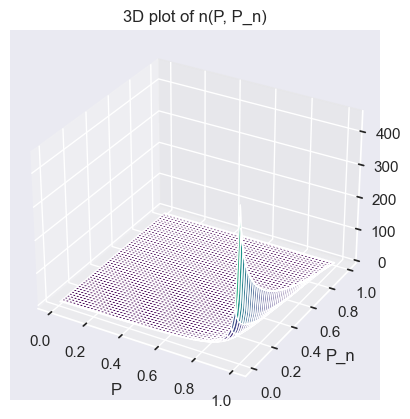

In [ ]:
# Just for curiosity, let's see how this graph looks in 3D for different values of P and P_n

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
E = np.linspace(0, 1, 100)
P_n = np.linspace(0, 1, 100)
E, P_n = np.meshgrid(E, P_n)
N = n(E, P_n)

ax.plot_surface(E, P_n, N, cmap='viridis')
ax.set_xlabel('P')
ax.set_ylabel('P_n')
ax.set_title('3D plot of n(P, P_n)')
plt.show()

The maximum value of this function $n$ is actually when $P=1$, and $P_n=0$, meaning when we need no confidence of winning, because we are certain of the outcome, namely, winning. In that case we can just play infinitely, knowing that we'll always win. 

Conversely, the lowest value of $n$ can be reached with $P=0$, $P_n=1$. In that case we expect the highest confidence of winning, but with the certainty of losing.

## Raising the stakes

Okay, let's switch gears, and instead of a common game, we're playing the extinction game. 

In each play of this game, humanity goes extinct during a given time period, or not. What we used earlier as the probability of winning the game $P$ now means that humanity survived for some time period, be it 5, 10 or 100 years. 

So we re-formulate our game as follows. 

- $P$ is the probability of humanity's survival for a given time period.
- $E$ is the probability of extinction for a given time period.
- $P_n$ is the probability that humanity will survive for $n$ periods in a row. 
- $\bar{P_n}$ is the probability that humanity will have undergone an extinction event after $n$ periods.

We get a certain probability of being alive after $n$ centuries by surviving in every game:

$$
P_n=P^n
$$


In [5]:
def P_survival(E, n):
    """
    This function takes the extinction risk per century, and the number of centuries we want to survive, and returns the probability of survival.
    """
    return (1-E)**n

E=1/6
n=2
P_n = P_survival(E, n)
print(f"Probability of survival after {n} centuries: {P_n:.2%}")

Probability of survival after 2 centuries: 69.44%


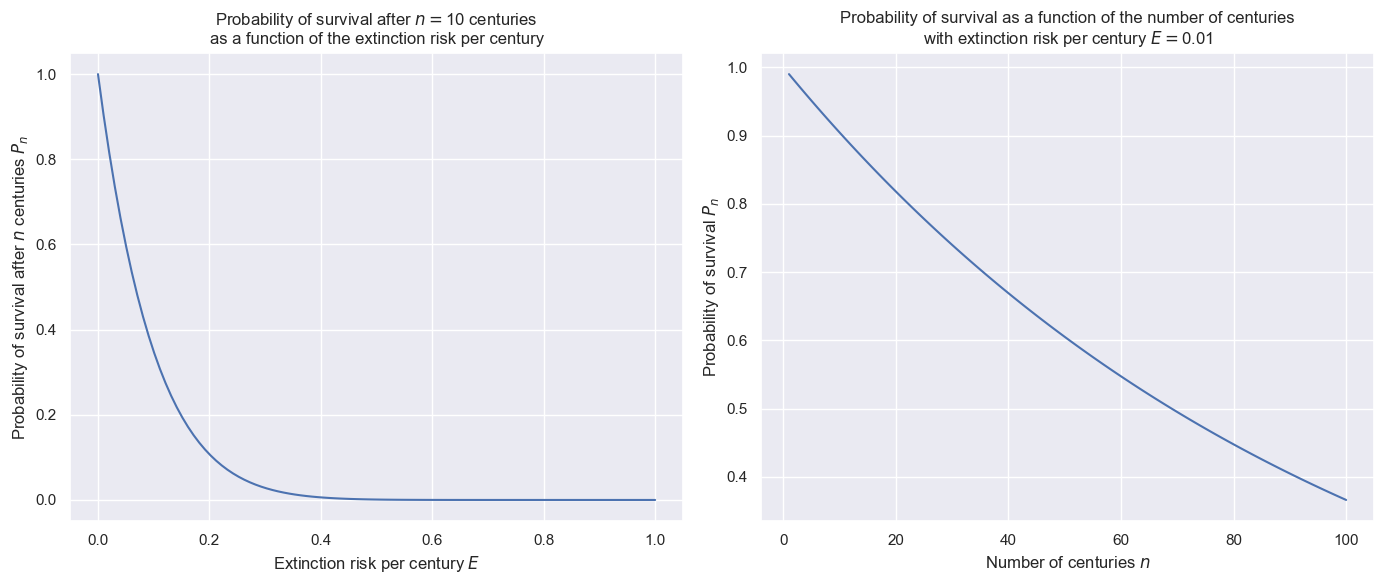

In [ ]:
# Visualize the probability of survival after n centuries as a function of the extinction risk per century

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# First graph: Probability of survival after n centuries as a function of existential risk
E = np.linspace(0, 1, 100)
n = 10
P_n = P_survival(E, n)
ax1.plot(E, P_n)
ax1.set_xlabel('Extinction risk per century $E$')
ax1.set_ylabel('Probability of survival after $n$ centuries $P_n$')
ax1.set_title(f'Probability of survival after $n=${n} centuries\nas a function of the extinction risk per century')

# Second graph: Probability of survival as a function of the number of centuries
n = np.linspace(1, 100, 100)
E = 0.01
P_n = P_survival(E, n)
ax2.plot(n, P_n)
ax2.set_xlabel('Number of centuries $n$')
ax2.set_ylabel('Probability of survival $P_n$')
ax2.set_title(f'Probability of survival as a function of the number of centuries\nwith extinction risk per century $E=${E}')

plt.tight_layout()
plt.show()


As a time period, let's use centuries. So using the formula above, we can calculate the number of centuries we can expect to survive with a "confidence" of, say 90%. We assume an extinction risk of 1% per century.
$$
\begin{align}
P_n&=0.9\\
E&=0.01\\
n&=\frac{\log(P_n)}{\log(1-E)} \\
n&=\frac{\log(0.9)}{\log(0.01)} \\
n&\approx2
\end{align}
$$

So, in this scenario, we could expect a probability of 90% of being around after 200 years.


In [7]:

def n_survival(E, P_n):
    """
    This function takes the extinction risk per century, and a confidence level we want to reach, and returns the number of centuries we can expect to survive.

    Args:
    E: Probability of extinction after one century
    P_n: Probability of survival after n centuries
    Returns:
    N: Number of centuries to play
    """
    return np.log(P_n)/np.log(1-E)


In [8]:
P_n=0.9 # Probability of survival after n centuries
E=0.01 # Probability of extinction after one century
N = n_survival(P_n, E) # Number of centuries to play
print(f"We get {N*100:.1f} years before extinction is {P_n:.0%} likely")

We get 200.0 years before extinction is 90% likely


On the 19th of November, a day after Russia responded to Ukraine's hits with ATACMS missiles, I found a [Manifold Market](https://manifold.markets/PlasmaBallin/will-a-nuclear-war-wipe-out-humanit-80eb7515b74e)[^1] on nuclear war wiping out humanity by 2030, which stands at 9%. Other related markets also stand at uncomfortably high numbers, like ["Will a nuclear weapon be detonated on a civilian or military target by 2030?"](https://manifold.markets/ozzyphantom/will-a-nuclear-weapon-be-detonated-Q6thd8lzCE), at 32%, and "[Will there be a Nuclear Explosion by 2030?](https://manifold.markets/V4D0NTH8/will-there-be-a-nuclear-explosion-b)", at 77% -- mind that this includes nuclear tests, thus nuclear devices used outside of the battlefield, which with rising geopolitical tensions seems relatively likely.

Similar questions on [Metaculus](https://www.metaculus.com/) are a more skeptic, but as I'll explain in the sections below, the numbers are still way too high. The question ["Will a nuclear weapon detonation kill at least 10 people in 2024?"](https://www.metaculus.com/questions/20768/10-deaths-due-to-nuclear-detonation-in-2024/), is at 0.1%, and for the question ["Will Russia test a nuclear weapon in the following years?"](https://www.metaculus.com/questions/13125/russian-nuclear-tests-20222024/) the odds stand at 2% for 2024.

Below we scale those probabilities to risk per century.

In [45]:
# Scaling odds of extinction
def scale_E(E, n_1, n_2):
    """
    This function scales the existential risk from one period n_1 to another period n_2.
    
    Example: If the risk of extinction in 5 years is 1%, what is the risk of extinction in 100 years?

    We can calculate this by first, asking what's the probability of survival for 20 times 5 years:
    P_survival_100_years = (1-E)**20
    Then, the existential risk after 20 times 5 years is the complement of the probability of survival:
    E_100_years = 1 - P_survival_100_years
    """
    return 1 - P_survival(E, n_2/n_1)


In [ ]:
# Scale 9% for 5 years to 100 years    
E_5_years = 0.09
E_09_per_5_years_to_100_years= scale_E(E_5_years, 5, 100)
E_09_per_5_years_to_100_years

Probability of survival after 100 years with a 9% risk of extinction per 5 years: 15.16%


0.8483550869498241

In [ ]:
E_1_year = 0.001
E_0001_per_year_to_100_years = scale_E(E_1_year, 1, 100)
E_0001_per_year_to_100_years

0.09520785288629108


A probability of nuclear war of 9% per year translates to around 84% per year, and a probability of 0.1 percent per year translates to 9.5% per year.

How long can we expect to live with a 90% probability with those odds?

In [49]:
# How long can we expect to live with these odds?

P_n = 0.9
n_09_per_5_years = n_survival(E_09_per_5_years_to_100_years, P_n)
print(f"With a 9% risk of extinction every 5 years, we can expect to live for {n_09_per_5_years:.1f} centuries with a 90% probability.")

n_0001_per_year = n_survival(E_0001_per_year_to_100_years, P_n)
print(f"With a 0.01% risk of extinction every year, we can expect to live for {n_0001_per_year:.1f} centuries with a 90% probability.")

With a 9% risk of extinction every 5 years, we can expect to live for 0.1 centuries with a 90% probability.
With a 0.01% risk of extinction every year, we can expect to live for 1.1 centuries with a 90% probability.


With a 9% risk of extinction every 5 years, we can expect to live for 0.1 centuries with a 90% probability.

With a 0.01% risk of extinction every year, we can expect to live for 1.1 centuries with a 90% probability.

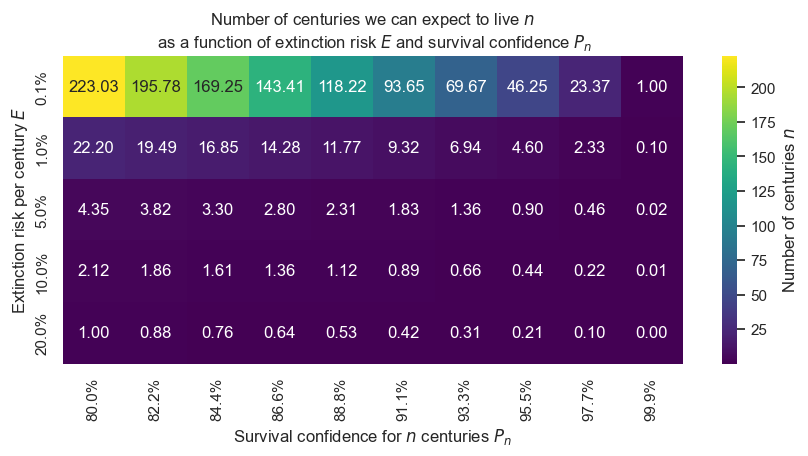

In [63]:
# Show a table for the number of centuries we can expect to live with different probabilities for survival, and different extinction risks per century.T

import pandas as pd

size = 10
E=[0.001, 0.01, 0.05, 0.1, 0.2]
P_n=np.linspace(0.8, 0.999, size)
N = np.zeros((len(E), len(P_n)))

for i, e in enumerate(E):
    for j, p in enumerate(P_n):
        N[i, j] = n_survival(e, p)

df = pd.DataFrame(N, index=E, columns=P_n)

# Show only the upper 5 columns
df_upper = df.iloc[:5, :]

plt.figure(figsize=(10, 4))
sns.heatmap(df_upper, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Number of centuries $n$'})
plt.xlabel('Survival confidence for $n$ centuries $P_n$')
plt.ylabel('Extinction risk per century $E$')
plt.title('Number of centuries we can expect to live $n$\n as a function of extinction risk $E$ and survival confidence $P_n$')
plt.xticks(ticks=np.arange(len(df_upper.columns)) + 0.5, labels=[f"{x:.1%}" for x in df_upper.columns])
plt.yticks(ticks=np.arange(len(df_upper.index)) + 0.5, labels=[f"{y:.1%}" for y in df_upper.index])
plt.show()

/var/folders/gp/134vcy4x6c19634zvbkbff900000gn/T/ipykernel_89433/3572703735.py:11: RuntimeWarning: divide by zero encountered in log
  return np.log(P_n)/np.log(1-E)


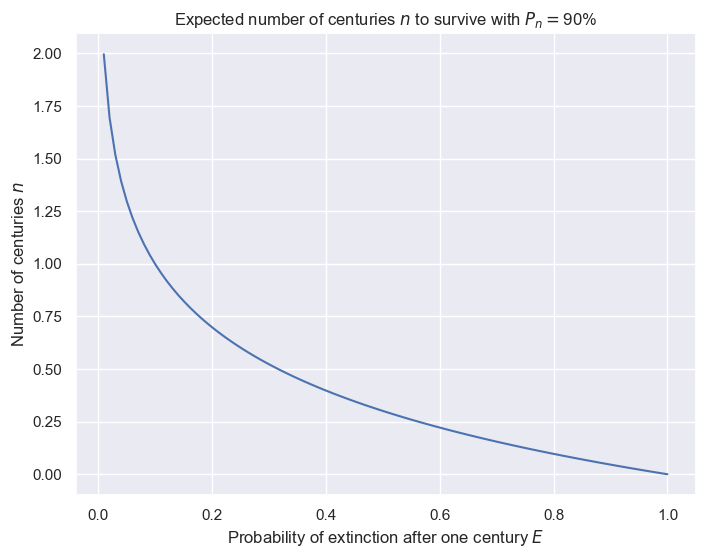

In [9]:
# Visualize the number of centuries we can expect to survive as a function of the probability of extinction after one century

P_n=0.9 # Probability of survival after n centuries
E = np.linspace(0, 1, 100) # Probability of extinction after one century

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(E, n_survival(P_n, E))
ax.set_xlabel('Probability of extinction after one century $E$')
ax.set_ylabel('Number of centuries $n$')
ax.set_title(f'Expected number of centuries $n$ to survive with $P_n=${P_n:.0%}')
plt.show()

Okay, so this graph tells us that if the existential risk $E$ is high -- for instance around 0.9 -- we need to reduce it by a lot to gain more centuries $n$. But, if existential risk is already low -- say 0.01 -- even marginal gains result in more survival time. This is visualized by the arrows in the graph below.

/var/folders/gp/134vcy4x6c19634zvbkbff900000gn/T/ipykernel_89433/3572703735.py:11: RuntimeWarning: divide by zero encountered in log
  return np.log(P_n)/np.log(1-E)
/var/folders/gp/134vcy4x6c19634zvbkbff900000gn/T/ipykernel_89433/3572703735.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.log(P_n)/np.log(1-E)


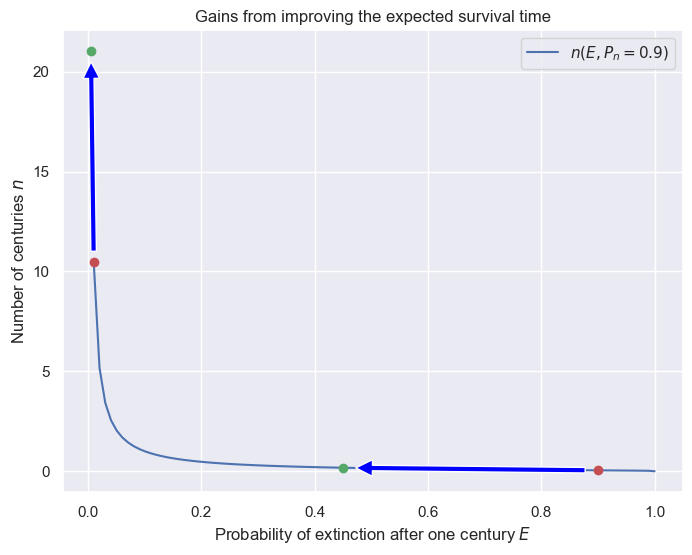

In [10]:
# Visualize the gains from improving the expected survival time

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the original curve
ax.plot(E, n_survival(E, P_n), label=f'$n(E, P_n={P_n})$')
E_high_1, E_high_2 = (0.9, 0.45)
E_low_1, E_low_2 = (0.01, 0.005)

# Mark the points and their new positions
points = [(E_high_1, n_survival(E_high_1, P_n)), (E_low_1, n_survival(E_low_1, P_n))]
new_points = [(E_high_2, n_survival(E_high_2, P_n)), (E_low_2, n_survival(E_low_2, P_n))]

for (x, y), (new_x, new_y) in zip(points, new_points):
  ax.plot(x, y, 'ro')  # Original point
  ax.plot(new_x, new_y, 'go')  # New point
  ax.annotate('', xy=(new_x, new_y), xytext=(x, y),
        arrowprops=dict(facecolor='blue', shrink=0.05))

ax.set_xlabel('Probability of extinction after one century $E$')
ax.set_ylabel('Number of centuries $n$')
ax.set_title('Gains from improving the expected survival time')
ax.legend()
plt.show()


The following question comes up: Is there a minimum Existential Risk reduction we need to ensure, in order to keep going?

## How much for more time?

Based on the formula for $n(E, P_n)$, we can calculate the "extra time", we can expect to live -- with a given probability $P_n$ -- if we halve our extinction risk $E$.

For instance, we get that by halving existential risk $E$ from 1% to 0.5% we could expect to live 1054 years more -- with a probability $P_n$ of 90%.

That's encouraging I think. Why? Because with that improvement we bought ourselves more time to decrease existential risk even more -- more than a thousand years. What's more, this result could be considered "sustainable", meaning that by that reduction we can expect to outlive the period we're considering.


In [11]:
P_n = 0.9
E_1 = 0.01 # Existential risk per century 2
E_2 = E_1/2 # Improved existential risk per century 
n_1 = n_survival(E_1, P_n)
n_2 = n_survival(E_2, P_n)
delta_n = n_2 - n_1
print(f'By decreasing existential risk from {E_1:.2%} to {E_2:.2%}, we can expect to last {delta_n*100:.0f} years more')

By decreasing existential risk from 1.00% to 0.50%, we can expect to last 1054 years more


But maybe continuously halving existential risk is ambitious, and according to this math, it's not always even necessary, given that if existential risk is already low, we can expect more gains from smaller improvements.

So by how much do we need to reduce our existential risk per century, starting from a given risk $E$ to outlive the next century with a given probability?

Well, if the existential risk in a given century is so bad that we can't expect to outlive that period, we need to reduce it by some amount.

A scenario with these characteristics would be one where our confidence on our survival is *lower* than our current chance of survival:

$$
1-E > P_n
$$

This means that all we need to do in a given century is to reduce existential risk enough, so our chance of survival matches our desired confidence level. This, again, seems like a tautology: If we want to ensure our survival we need to increase our confidence in it, by reducing existential risk. 

If we want to outlive the current century with a probability higher than 99%, then we must reduce existential risk to 1% or less. If the risk is actually higher, at say 2%, extinction is also relatively unlikely, but we don't have that 99% confidence in the outcome.


## What does hope look like?

So, these numbers show us that the more confident we want to be about our own fate, the less ensured a future we'll have, or the more work we need to do to reduce existential risk. That's just a convoluted way of saying that the future is uncertain, and that if you want something close to certainty, then you can't look too far ahead.

But wait, the equations we've been using actually have two variables, one is this confidence level about being alive $P_n$, and the other one is the actual risk of extinction $E$.

I think it's sensible to place high confidence in the future of humanity. Why should we be happy with 9 in 10 odds of being alive after 200 years given the stakes? That seems too little time left, and a high chance of being dispatched (10%). But we could do something to lower the likelihood of extinction per century.

So let's be ambitious. We ask to still be around for a billion years, that's $10^7$ centuries. Then how big should our extinction risk per century allowed to be, if we wanted to live that long with a 99.99% probability?

To solve this mathematically is not very convoluted. We can start with the equation for $P_n$, and solve for $E$, while $n$ becomes a constant:

$$
\begin{align}
P_n&=(1-E)^n \\
\sqrt[n]{P_n}&=1-E \\
E&=1-\sqrt[n]{P_n}
\end{align}
$$

In [69]:
def P_extinction(n, P_n):
    """
    This function takes the number of centuries we expect to survive, and a confidence level we want to reach, and returns the probability of extinction after one century.

    Args:
    n: Number of centuries
    P_n: Probability of survival after n centuries
    
    Returns:
    E: Probability of extinction per century
    """
    return 1- P_n**(1/n)

n=2e9/100.0 # Two billion years as number of centuries
P_n=0.9999 # Probability of survival after n centuries
E = P_extinction(n, P_n) # Probability of extinction after one century

print(0.01/E)

print(f"We get that the extinction risk per century shouldn't be higher than {E:.12%} to last one billion years with {P_n:.2%} percent survival probability")

1999911020.6361277
We get that the extinction risk per century shouldn't be higher than 0.000000000500% to last one billion years with 99.99% percent survival probability


We can visualize the course of the extinction risk depending on how long we expect to be around with a certain probability, in this case, fixed at 99%.

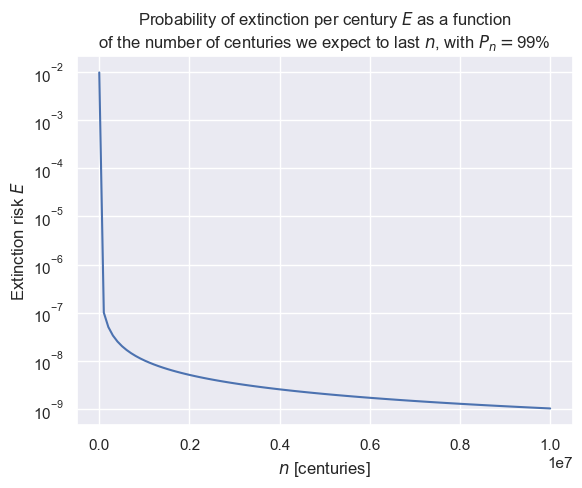

In [13]:
# Visualize the results by fixing P_n and varying n.
P_n=0.99
n = np.linspace(1, 1e7, 100)
E = P_extinction(n, P_n)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n, E)
ax.set_title(f"Probability of extinction per century $E$ as a function\nof the number of centuries we expect to last $n$, with $P_n=${P_n:.0%}")
ax.set_xlabel('$n$ [centuries]')
ax.set_yscale('log')
ax.set_ylabel('Extinction risk $E$')
plt.show()

We can observe the same effect as above. When $E$ is high, we gain little by reducing existential risk. But once it is lower, we gain a lot from it. Mind the axes in this visualization. The $y$ axis is logarithmic and the $x$-axis goes from 0 to 10 million centuries.
We can see that we start to get real gains once we reach an existential risk of $E\leq10^{-7}$.

Below we can see how $E$ is affected by different confidence levels $P_n$.

Text(0.5, 1.0, 'Probability of extinction per century $E$ as a function\nof the number of centuries we expect to last $n$')

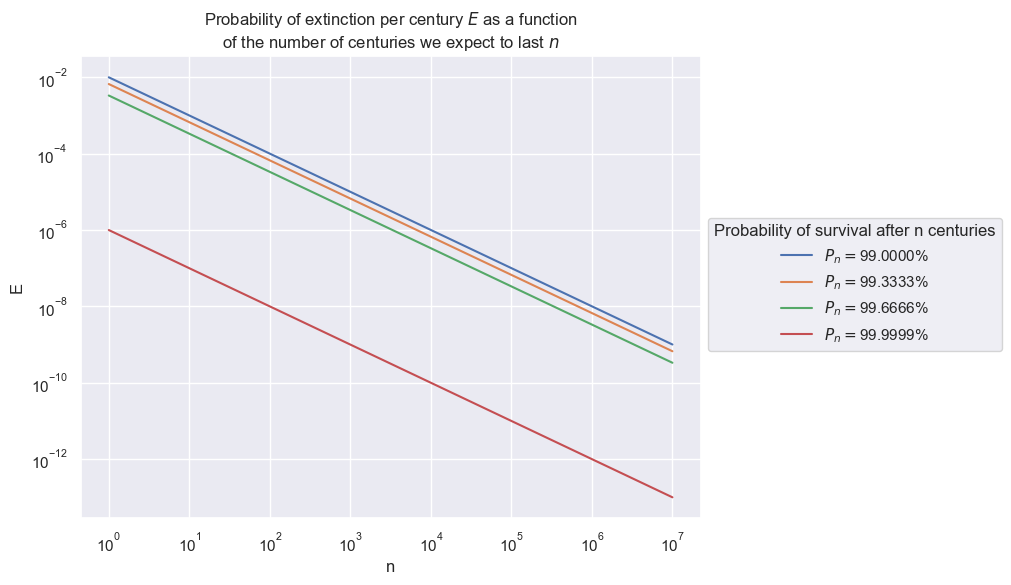

In [14]:
# Visualize the same graph with different values for P_n

P_n = np.linspace(0.99, 0.999999, 4)
E_P_n = [P_extinction(n, P_n) for P_n in P_n]

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('E')
ax.set_xlabel('n')
for i, P_n in enumerate(P_n):
    ax.plot(n, E_P_n[i], label=f'$P_n=${P_n:.4%}')
fig.legend(title='Probability of survival after n centuries', loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.set_title(f"Probability of extinction per century $E$ as a function\nof the number of centuries we expect to last $n$")